In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['axes.grid'] = False

In [4]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))
num_temps = 100

In [5]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

In [6]:
pred_tc = {}

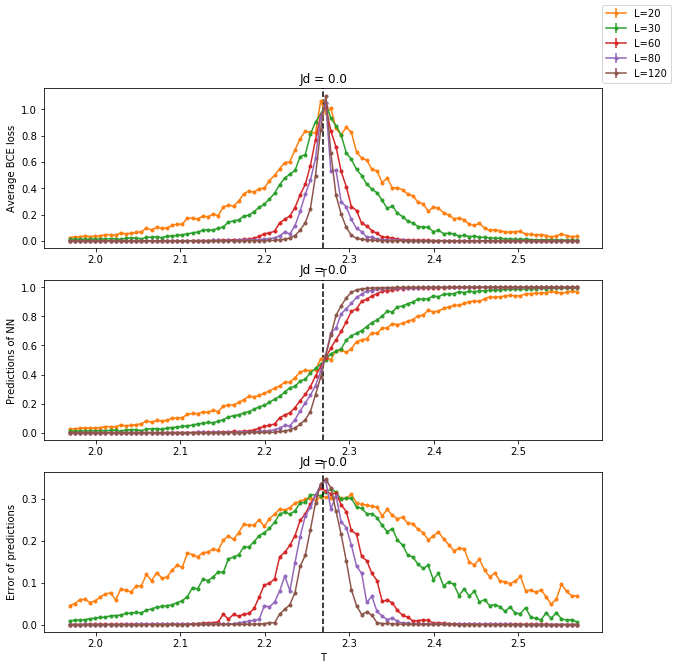

In [7]:
Jd = 0.0
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
epochs = opt_epochs[Jd]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

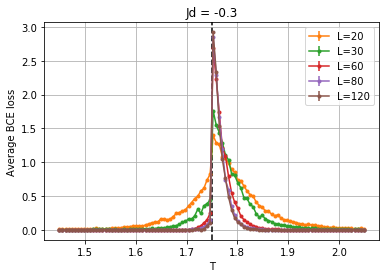

In [8]:
#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
plt.errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

'''#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4', label='L=80')
plt.errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5', label='L=120')'''

'''#ax[2].plot(T, stds_err(outs_10), marker='.')
plt.plot(T, stds_err(outs_20), marker='.', c='C1')
plt.plot(T, stds_err(outs_30), marker='.', c='C2')
plt.plot(T, stds_err(outs_60), marker='.', c='C3')
plt.plot(T, stds_err(outs_80), marker='.', c='C4')
#ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')'''

plt.axvline(x=T_c, color='black', linestyle='--')
#ax[1].axvline(x=T_c, color='black', linestyle='--')
#ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.xlabel('T')
plt.ylabel('Average BCE loss')
#plt.ylabel('Predictions of NN')
#plt.ylabel('Error of predictions')

plt.title(f'Jd = {Jd}')
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.savefig(f'images/{Jd}_100_bce_opt_epoch.png', bbox_inches='tight')

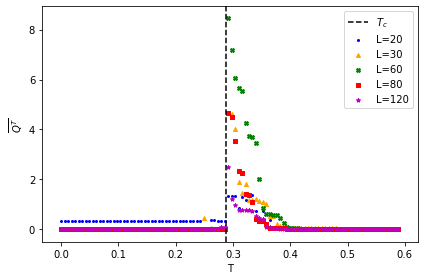

In [50]:
Jd = -0.9
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
epochs = opt_epochs[Jd]

markers=['.', '^', 'X', 's', '*', 'p']
colors=['blue', 'orange', 'green', 'red', 'm', 'gold']

Ls = [20, 30, 60, 80, 120]

errs_ = []
outs_ = []

for i, L in enumerate(Ls):
    #num_epochs = epochs[i]
    with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

for i, L in enumerate(Ls):
    plt.scatter(T[T>0], errs(errs_[i])[T>0], marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    # ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    # ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    # ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='.', c=f'C{i+1}')


    # ax[1].axvline(x=T_c, color='black', linestyle='--')
    # ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.xlabel('T')
    plt.ylabel('$\overline{Q^T}$')
    # ax[1].set_ylabel('Predictions of NN')
    # ax[2].set_ylabel('Error of predictions')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
#plt.setp(ax, title=f'Jd = {Jd}')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/{Jd}_100_bce_opt_epoch.png')

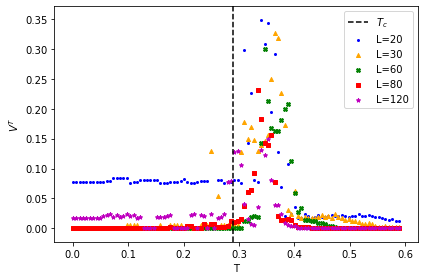

In [51]:
markers=['.', '^', 'X', 's', '*']
colors=['blue', 'orange', 'green', 'red', 'm']

for i, L in enumerate(Ls):
    # plt.scatter(T, errs(errs_[i]), marker=markers[i], s=16, label=f'L={L}', c=colors[i])
    # ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    # ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    plt.scatter(T[T>0], stds_err(outs_[i])[T>0], marker=markers[i], label=f'L={L}', c=colors[i], s=16)


    # ax[1].axvline(x=T_c, color='black', linestyle='--')
    # ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.xlabel('T')
    # plt.ylabel('$\overline{Q^T}$')
    # ax[1].set_ylabel('Predictions of NN')
    plt.ylabel('$V^T$')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
#plt.setp(ax, title=f'M = {M}')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/{Jd}_100_err_opt_epoch.png', bbox_inches='tight')

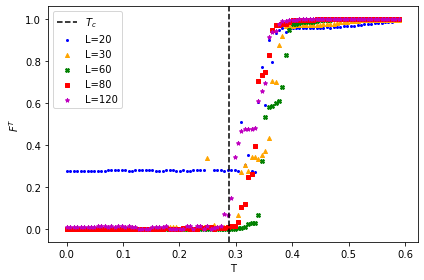

In [52]:
for i, L in enumerate(Ls):
    # plt.scatter(T, errs(errs_[i]), marker=markers[i], s=16, label=f'L={L}', c=colors[i])
    plt.scatter(T[T>0], errs(outs_[i])[T>0], marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    #plt.scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    # plt.scatter(T, stds_err(outs_[i][:, 0]), marker=markers[i], label=f'L={L}', c=colors[i])


    # ax[1].axvline(x=T_c, color='black', linestyle='--')
    # ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.xlabel('T')
    # plt.ylabel('$\overline{Q^T}$')
    # ax[1].set_ylabel('Predictions of NN')
    plt.ylabel('$F^T$')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
#plt.setp(ax, title=f' = {M}')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/{Jd}_100_pred_opt_epoch.png', bbox_inches='tight')

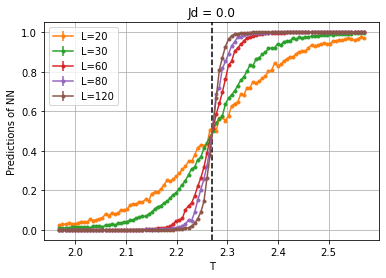

In [9]:
'''#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
plt.errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')'''

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4', label='L=80')
plt.errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5', label='L=120')

'''#ax[2].plot(T, stds_err(outs_10), marker='.')
plt.plot(T, stds_err(outs_20), marker='.', c='C1')
plt.plot(T, stds_err(outs_30), marker='.', c='C2')
plt.plot(T, stds_err(outs_60), marker='.', c='C3')
plt.plot(T, stds_err(outs_80), marker='.', c='C4')
#ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')'''

plt.axvline(x=T_c, color='black', linestyle='--')
#ax[1].axvline(x=T_c, color='black', linestyle='--')
#ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.xlabel('T')
#plt.ylabel('Average BCE loss')
plt.ylabel('Predictions of NN')
#plt.ylabel('Error of predictions')

plt.title(f'Jd = {Jd}')
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.savefig(f'images/{Jd}_100_pred_opt_epoch.png', bbox_inches='tight')

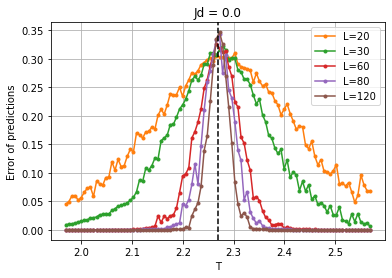

In [10]:
'''#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
plt.errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')'''

'''#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4', label='L=80')
plt.errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5', label='L=120')

'''#ax[2].plot(T, stds_err(outs_10), marker='.')
plt.plot(T, stds_err(outs_20), marker='.', c='C1', label='L=20')
plt.plot(T, stds_err(outs_30), marker='.', c='C2', label='L=30')
plt.plot(T, stds_err(outs_60), marker='.', c='C3', label='L=60')
plt.plot(T, stds_err(outs_80), marker='.', c='C4', label='L=80')
plt.plot(T, stds_err(outs_120), marker='.', c='C5', label='L=120')

plt.axvline(x=T_c, color='black', linestyle='--')
#ax[1].axvline(x=T_c, color='black', linestyle='--')
#ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.xlabel('T')
#plt.ylabel('Average BCE loss')
#plt.ylabel('Predictions of NN')
plt.ylabel('Error of predictions')

plt.title(f'Jd = {Jd}')
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.savefig(f'images/{Jd}_100_err_opt_epoch.png', bbox_inches='tight')

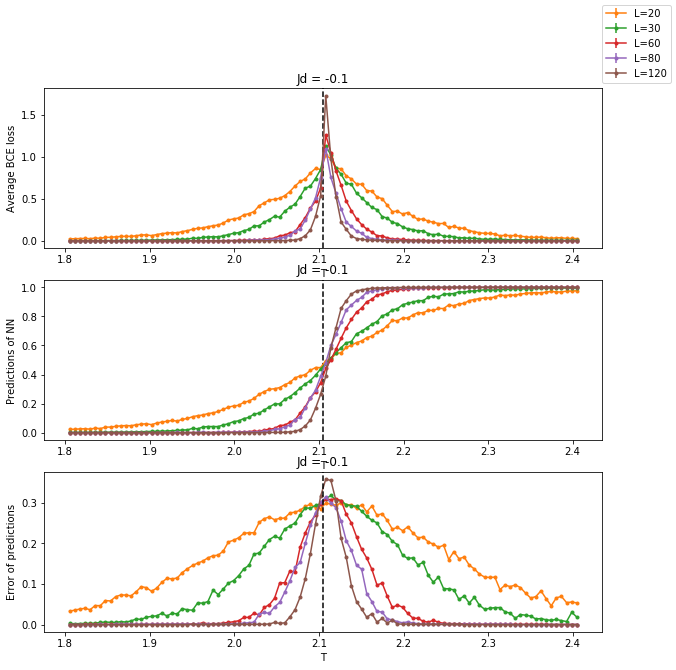

In [8]:
Jd = -0.1
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [4, 1, 3, 2, 2]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

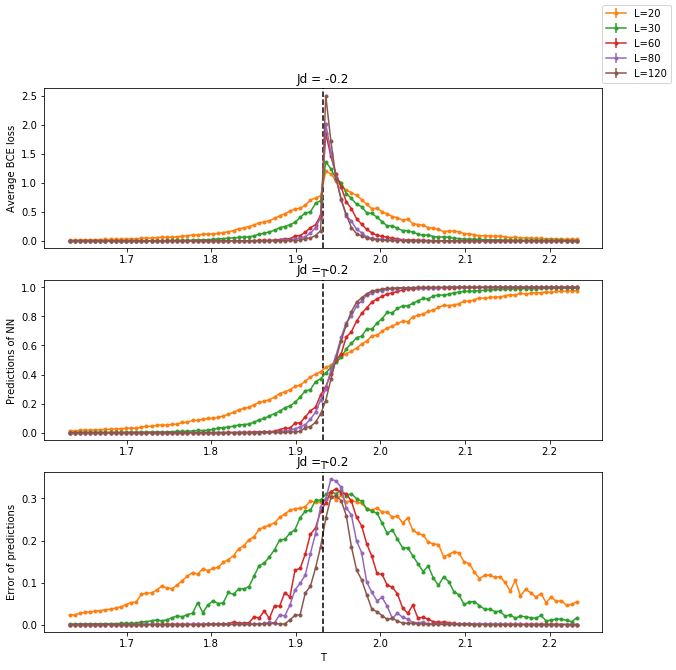

In [9]:
Jd = -0.2
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [4, 1, 3, 3, 3]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

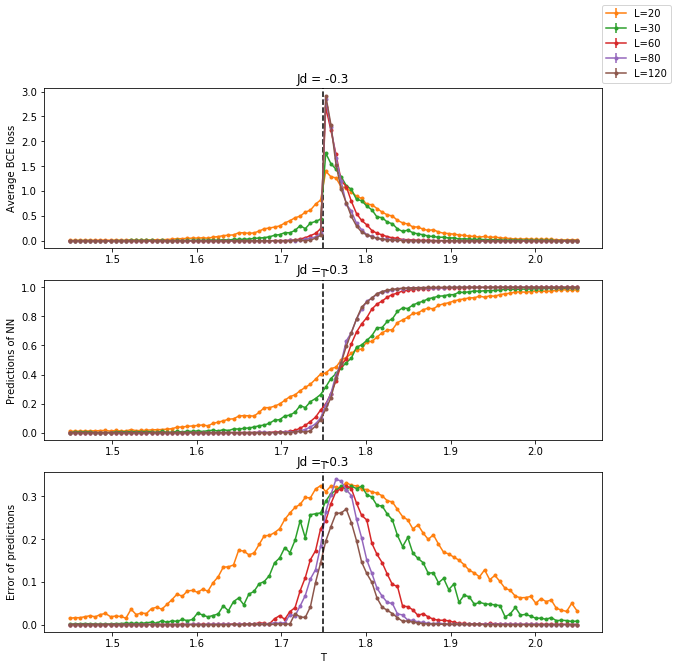

In [10]:
Jd = -0.3
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [2, 1, 3, 3, 3]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

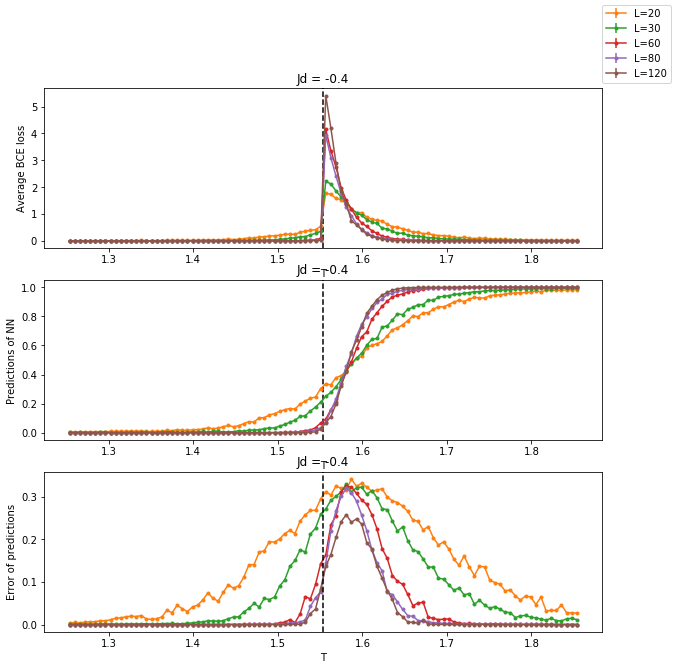

In [11]:
Jd = -0.4
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [2, 1, 6, 3, 5]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

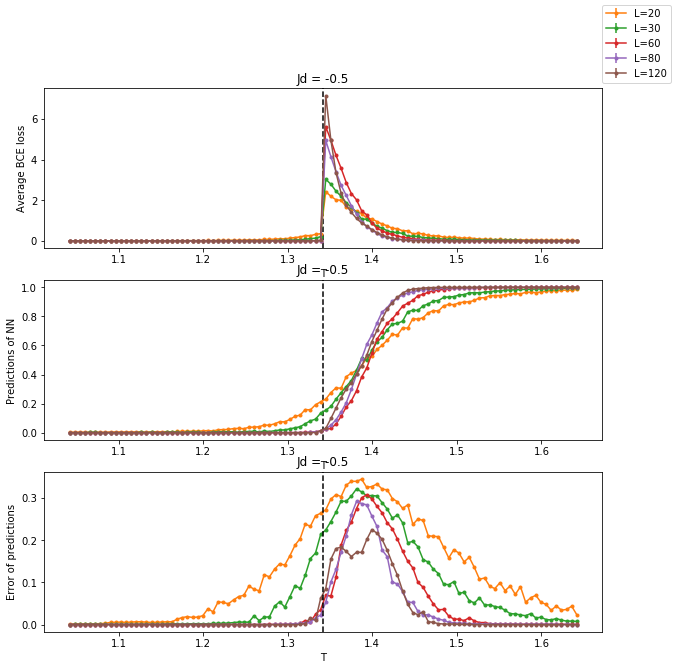

In [12]:
Jd = -0.5
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

#epochs = [2, 1, 4, 3, 11]
epochs = [2, 1, 4, 3, 5]
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

In [ ]:
Jd = -0.7
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 120
errs_ = []
outs_ = []
for num_epochs in range(1, 16):
    with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f))
    with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.load(f))

fig, ax = plt.subplots(3, 1, figsize=(10,10))

[ax[0].errorbar(T, errs(errs_[j-1]), yerr=stds_err(errs_[j-1])/1000, marker='.', label=f'L=120, {j}') for j in range(1, 16)]
[ax[1].errorbar(T, errs(outs_[j-1]), yerr=stds_err(outs_[j-1])/1000, marker='.') for j in range(1, 16)]

[ax[2].plot(T, stds_err(outs_[j-1]), marker='.') for j in range(1, 16)]


ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#ax[1].set_xlim(T_c-0.1, T_c+0.1)
ax[2].set_xlim(T_c-0.1, T_c+0.2)
plt.show()

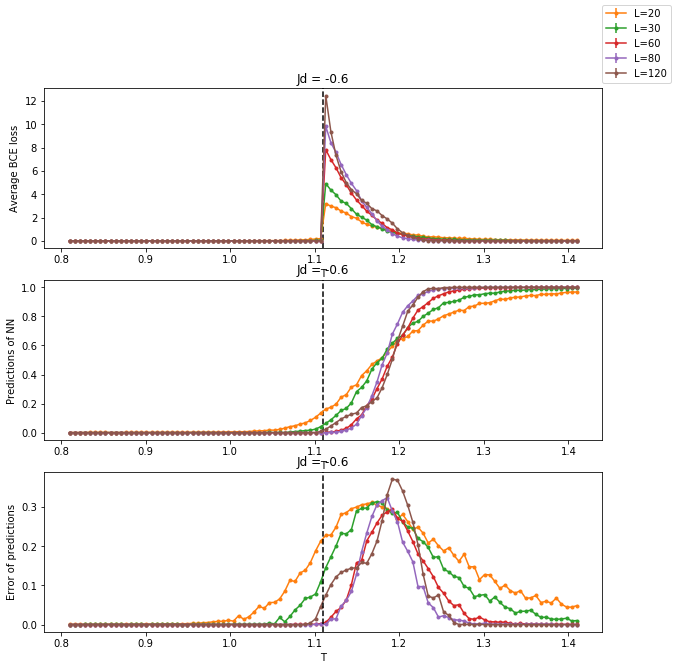

In [13]:
Jd = -0.6
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [4, 2, 4, 4, 11]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

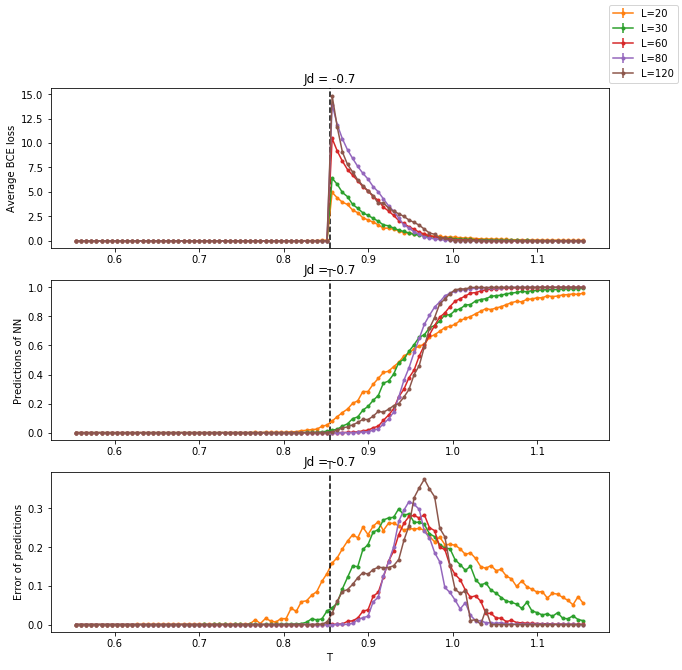

In [14]:
Jd = -0.7
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

#epochs = [5, 2, 4, 4, 8]
opt_epochs = np.load('opt_epochs_ll.npy', allow_pickle='TRUE').item()
epochs = opt_epochs[Jd]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = 11
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

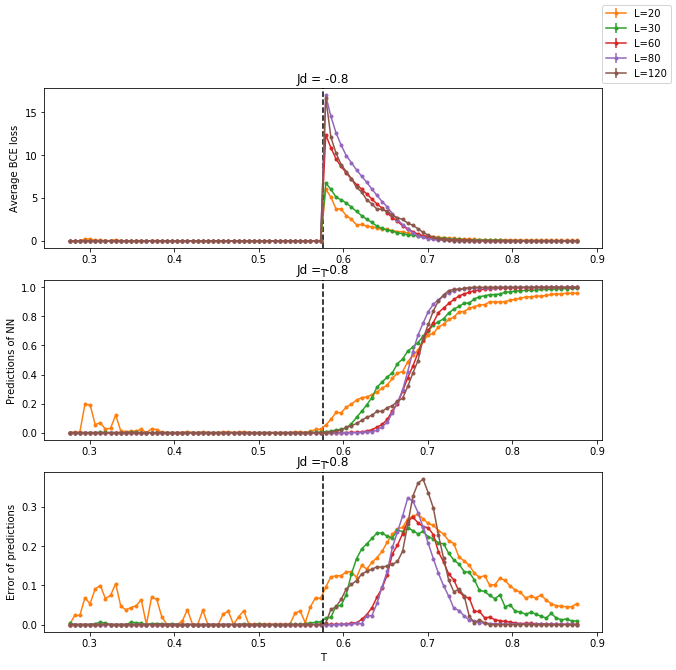

In [16]:
Jd = -0.8
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [5, 2, 4, 4, 8]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = 11
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4')
ax[1].errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

#ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.', c='C1')
ax[2].plot(T, stds_err(outs_30), marker='.', c='C2')
ax[2].plot(T, stds_err(outs_60), marker='.', c='C3')
ax[2].plot(T, stds_err(outs_80), marker='.', c='C4')
ax[2].plot(T, stds_err(outs_120), marker='.', c='C5')

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

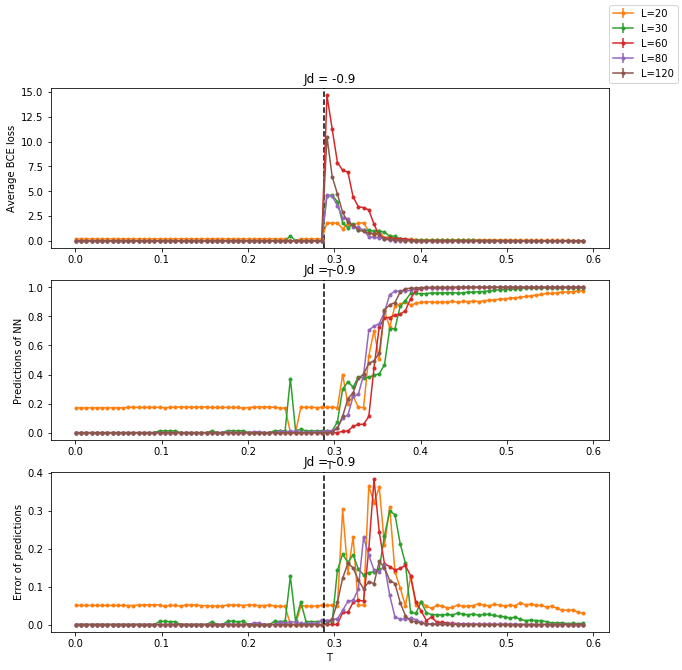

In [17]:
Jd = -0.9
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [3, 3, 6, 2, 4]
'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_120 = np.load(f)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T[T>0], errs(errs_20)[T>0], yerr=stds_err(errs_20)[T>0]/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T[T>0], errs(errs_30)[T>0], yerr=stds_err(errs_30)[T>0]/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T[T>0], errs(errs_60)[T>0], yerr=stds_err(errs_60)[T>0]/1000, marker='.', label='L=60', c='C3')
ax[0].errorbar(T[T>0], errs(errs_80)[T>0], yerr=stds_err(errs_80)[T>0]/1000, marker='.', label='L=80', c='C4')
ax[0].errorbar(T[T>0], errs(errs_120)[T>0], yerr=stds_err(errs_120)[T>0]/1000, marker='.', label='L=120', c='C5')

#ax[1].errorbar(T[T>0], errs(outs_10)[T>0], yerr=stds_err(outs_10)[T>0]/1000, marker='.')
ax[1].errorbar(T[T>0], errs(outs_20)[T>0], yerr=stds_err(outs_20)[T>0]/1000, marker='.', c='C1')
ax[1].errorbar(T[T>0], errs(outs_30)[T>0], yerr=stds_err(outs_30)[T>0]/1000, marker='.', c='C2')
ax[1].errorbar(T[T>0], errs(outs_60)[T>0], yerr=stds_err(outs_60)[T>0]/1000, marker='.', c='C3')
ax[1].errorbar(T[T>0], errs(outs_80)[T>0], yerr=stds_err(outs_80)[T>0]/1000, marker='.', c='C4')
ax[1].errorbar(T[T>0], errs(outs_120)[T>0], yerr=stds_err(outs_120)[T>0]/1000, marker='.', c='C5')

#ax[2].plot(T[T>0], stds_err(outs_10)[T>0], marker='.')
ax[2].plot(T[T>0], stds_err(outs_20)[T>0], marker='.', c='C1')
ax[2].plot(T[T>0], stds_err(outs_30)[T>0], marker='.', c='C2')
ax[2].plot(T[T>0], stds_err(outs_60)[T>0], marker='.', c='C3')
ax[2].plot(T[T>0], stds_err(outs_80)[T>0], marker='.', c='C4')
ax[2].plot(T[T>0], stds_err(outs_120)[T>0], marker='.', c='C5')

tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

ax[0].axvline(x=T_c, color='black', linestyle='--')
ax[1].axvline(x=T_c, color='black', linestyle='--')
ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

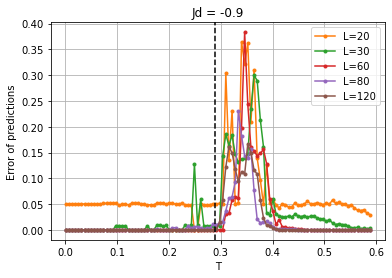

In [20]:
'''#ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80', c='C4')
plt.errorbar(T, errs(errs_120), yerr=stds_err(errs_120)/1000, marker='.', label='L=120', c='C5')'''

'''#ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', c='C1', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', c='C2', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', c='C3', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', c='C4', label='L=80')
plt.errorbar(T, errs(outs_120), yerr=stds_err(outs_120)/1000, marker='.', c='C5', label='L=120')

'''#ax[2].plot(T, stds_err(outs_10), marker='.')
plt.plot(T[T>0], stds_err(outs_20)[T>0], marker='.', c='C1', label='L=20')
plt.plot(T[T>0], stds_err(outs_30)[T>0], marker='.', c='C2', label='L=30')
plt.plot(T[T>0], stds_err(outs_60)[T>0], marker='.', c='C3', label='L=60')
plt.plot(T[T>0], stds_err(outs_80)[T>0], marker='.', c='C4', label='L=80')
plt.plot(T[T>0], stds_err(outs_120)[T>0], marker='.', c='C5', label='L=120')

plt.axvline(x=T_c, color='black', linestyle='--')
#ax[1].axvline(x=T_c, color='black', linestyle='--')
#ax[2].axvline(x=T_c, color='black', linestyle='--')

plt.xlabel('T')
#plt.ylabel('Average BCE loss')
#plt.ylabel('Predictions of NN')
plt.ylabel('Error of predictions')

plt.title(f'Jd = {Jd}')
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.savefig(f'images/{Jd}_100_err_opt_epoch.png', bbox_inches='tight')

In [18]:
pred_tc

{0.0: 2.273427738455397,
 -0.1: 2.111648834659211,
 -0.2: 1.9474592142720693,
 -0.3: 1.774187647781691,
 -0.4: 1.589381425085659,
 -0.5: 1.3933884305657216,
 -0.6: 1.1832936470917323,
 -0.7: 0.9505267357242635,
 -0.8: 0.6799099078376349,
 -0.9: 0.34732648998397225}

In [22]:
get_crit_T[-0.9]

0.2885386111960936

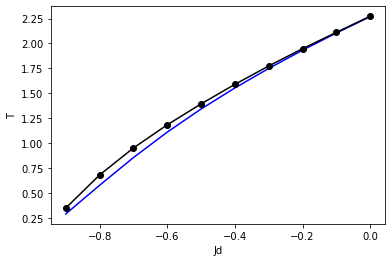

In [74]:
Jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]

plt.figure(facecolor='white')
plt.plot(Jds, [get_crit_T[Jd] for Jd in Jds], color='blue')
plt.plot(Jds, [pred_tc[Jd] for Jd in Jds], marker='o', color='black')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('Jd')
plt.ylabel('T')
plt.savefig(f'images/tcs.png', bbox_inches='tight')

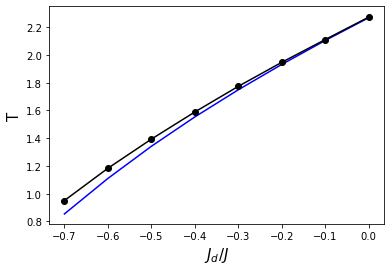

In [23]:
Jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7]

plt.figure(facecolor='white')
plt.plot(Jds, [get_crit_T[Jd] for Jd in Jds], color='blue')
plt.errorbar(Jds, [pred_tc[Jd] for Jd in Jds], yerr=T[1] - T[0], marker='o', color='black')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('$J_d/J$', fontsize=15)
plt.ylabel('T', fontsize=15)
plt.savefig(f'images/tcs_jd.png', bbox_inches='tight')

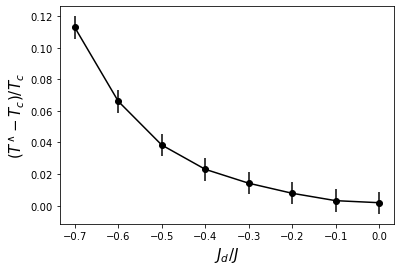

In [19]:
Jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7]

plt.figure(facecolor='white')
plt.errorbar(Jds, [(pred_tc[Jd] - get_crit_T[Jd]) / get_crit_T[Jd] for Jd in Jds], yerr=(T[1] - T[0])/ get_crit_T[Jd], marker='o', color='black')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('$J_d/J$', fontsize=15)
plt.ylabel('$(T^{\wedge} - T_c)/T_c$', fontsize=15)
plt.savefig(f'images/tcs_diff_jd.png', bbox_inches='tight')

In [21]:
mus = [0.9527, 1.1831, 1.3882, 1.5848, 1.7709, 1.9464, 2.1094, 2.2702]

jds = [-0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0]
mus_rel = [(mus[i] - get_crit_T[jds[i]]) / get_crit_T[jds[i]] for i in range(len(jds))]
yerrs = [7e-4, 7e-4, 4e-4, 8e-4, 5e-4, 5e-4, 6e-4, 9e-4]

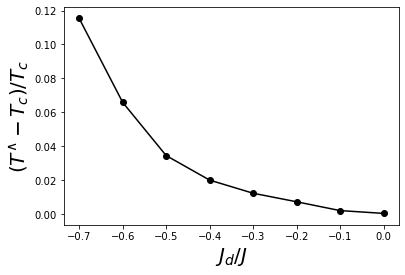

In [27]:
#yerrs = np.array([(np.array(ts_diff['max'][i]) - np.array(ts_diff['mean'][i]))/2/ts_diff['T_c'][i] for i in range(len(ts_diff['diff']))])
plt.errorbar(jds, mus_rel, yerr=yerrs, marker='o', color='black')
plt.xlabel('$J_d/J$', fontsize=20)
plt.ylabel('$(T^{\wedge} - T_c)/T_c$', fontsize=20)
# plt.xlim([0, 1.1])
# plt.ylim([0, 0.05])

plt.savefig('images/ts_star_diff_jd.png')

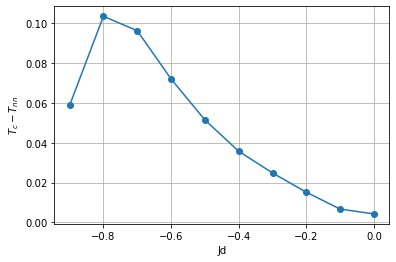

In [26]:
plt.figure(facecolor='white')
plt.plot(Jds, [np.abs(pred_tc[Jd] - get_crit_T[Jd])  for Jd in Jds], marker='o')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('Jd')
plt.ylabel('$T_c - T_{nn}$')
plt.savefig(f'images_mod/tcs_diff.png', bbox_inches='tight')

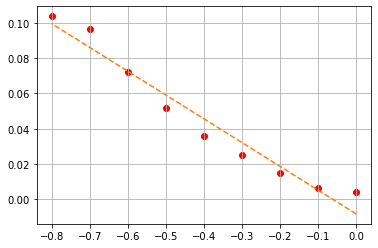

In [31]:
tc_diff = [np.abs(pred_tc[Jd] - get_crit_T[Jd])  for Jd in Jds[:-1]]

pf = np.polyfit(Jds[:-1], tc_diff, 1)

plt.plot(Jds[:-1], np.poly1d(pf)(Jds[:-1]), '--', label='fit', c='C1')
plt.scatter(Jds[:-1], tc_diff, marker='o', color='red')


In [32]:
pf

array([-0.13454545, -0.00822896])

In [46]:
Jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]
Jds_log = np.log(np.abs(Jds))
Jds_log[np.isneginf(Jds_log)] = 0.0
Jds_log

array([ 0.        , -2.30258509, -1.60943791, -1.2039728 , -0.91629073,
       -0.69314718, -0.51082562, -0.35667494, -0.22314355, -0.10536052])

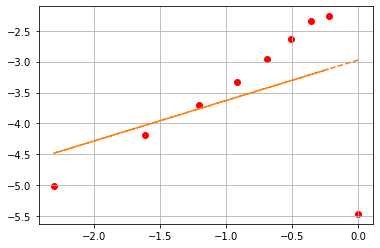

In [53]:
Jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]
tc_diff = [np.abs(pred_tc[Jd] - get_crit_T[Jd])  for Jd in Jds[:-1]]

Jds_log = np.log(np.abs(Jds[:-1]))
Jds_log[np.isneginf(Jds_log)] = 0.0

pf = np.polyfit(Jds_log, np.log(tc_diff), 1)

plt.plot(Jds_log, np.poly1d(pf)(Jds_log), '--', label='fit', c='C1')
plt.scatter(Jds_log, np.log(tc_diff), marker='o', color='red')

#plt.xscale('log')
#plt.yscale('log')

In [44]:
pf

array([ 1.35707908, -1.97762321])

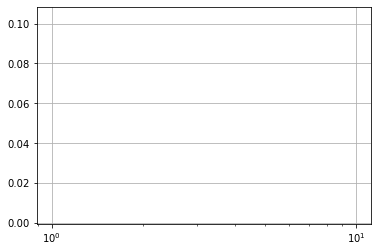

In [51]:
Jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]
tc_diff = [np.abs(pred_tc[Jd] - get_crit_T[Jd])  for Jd in Jds[:-1]]

Jds_log = np.log(np.abs(Jds[:-1]))
Jds_log[np.isneginf(Jds_log)] = 0.0

pf = np.polyfit(Jds_log, tc_diff, 1)

plt.plot(Jds[:-1], np.poly1d(pf)(Jds_log), '--', label='fit', c='C1')
plt.scatter(Jds[:-1], tc_diff, marker='o', color='red')

plt.xscale('log')
#plt.yscale('log')

In [98]:
dct = {0.0:   [5, 1, 3, 3, 2],
        -0.1: [4, 1, 3, 2, 2],
        -0.2: [4, 1, 3, 3, 3],
        -0.3: [2, 1, 3, 3, 3],
        -0.4: [2, 1, 6, 3, 5],
        -0.5: [2, 1, 4, 3, 5],
        -0.6: [4, 2, 4, 4, 6],
        -0.7: [5, 2, 4, 4, 8],
        -0.8: [5, 2, 4, 4, 8],
        -0.9: [3, 3, 6, 2, 4]}

In [99]:
np.save('opt_epochs.npy', dct) 

# Load
opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
print(opt_epochs[0.0]) 

[5, 1, 3, 3, 2]


In [ ]:
Jd = 0.0
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

epochs = [5, 1, 3, 3, 2]

'''L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)'''
    
L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_120 = np.load(f)

In [54]:
ts_nn = {}
Jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]
num_temps = 100
for Jd in Jds:
    ts_nn[Jd] = []
Ls = [20, 30, 60, 80, 120]
for Jd in Jds:
    T_c = get_crit_T[Jd]
    T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)
    for epoch in range(1, 31):
        tcs_idxs = []
        for L in Ls:
            with open(f'data_errors/{Jd}_{L}_{num_temps}_{epoch}_epochs.npy', 'rb') as f:
                errs_ = np.load(f) 
            with open(f'data_outputs/{Jd}_{L}_{num_temps}_{epoch}_epochs.npy', 'rb') as f:
                outs_ = np.load(f)
            
            tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_))))
        ts_nn[Jd].append(np.mean([T[tcs_idxs[i]] for i in range(5)]))

In [55]:
stds = []
for Jd in Jds:
    stds.append(np.std(ts_nn[Jd]))
stds

[0.003150738054930471,
 0.0024985252256549497,
 0.002555695289029269,
 0.003007591659627688,
 0.0032537170788344543,
 0.004425303133767445,
 0.00672991121249518,
 0.008527071470467655,
 0.00924016641848412,
 0.006283964949632952]

In [56]:
plt.figure(facecolor='white')
plt.errorbar(Jds, [pred_tc[Jd] - get_crit_T[Jd]  for Jd in Jds], yerr=stds, marker='o', color='black')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('Jd')
plt.ylabel('$T_{nn} - T_{c}$')
plt.savefig(f'images_mod/tcs_diff.png', bbox_inches='tight')

KeyError: -0.1

<Figure size 432x288 with 0 Axes>